In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Пусть задана совокупность точек $\{x_k\}_{k=0}^n$ и значения функции $f(x)$ в данных точках $\{f_k\}_{k=0}^n$.\
Будем считать, что $f(x)$ дифференцируема в некоторой окрестности точек $\{x_k\}_{k=0}^n$ достаточное количество раз.

**Задание (численное дифференцирование)**

Дана функция $f(x)$. Для неё необходимо:

1) Используя правую и центральные разности, численно вычислить первую производную функции $f(x)$ на отрезке $[a,b]$ в узлах сетки:
$$
f_k' = \frac{f_{k+1} - f_k}{h}, \qquad
f_k' = \frac{f_{k+1} - f_{k-1}}{2h}
$$
2) Используя центральные разности, вычислить вторую производную функции $f(x)$ со вторым и четвёртым порядком точности в узлах сетки:
$$
f_k'' = \frac{f_{k+1} - 2f_k + f_{k-1}}{h^2}, \qquad
f_k'' = \frac{-f_{k+2} + 16f_{k+1} - 30f_k + 16f_{k-1} - f_{k-2}}{12h^2}
$$
3) Построить графики численных производных, сравнить с аналитическим решением, вывести погрешности, проанализировать результаты.

**Функция для численного дифференцирования** (вариант 23):
$$
f(x) = (1 + \ln(x^2))\cos(e^x), \qquad 
x \in [0,2]
$$

In [3]:
def f(x):
    x = np.asarray(x, dtype = float)
    return (1 + np.log(x ** 2)) * np.cos(np.e ** x)

**Задание 1.**

In [4]:
def central_and_right_derivative(x, a, b, n, method):
    # x = np.linspace(a, b, n)
    h = x[1] - x[0]

    df_dx = np.zeros_like(x)

    if method == "right":
        for i in range(n - 1):
            df_dx[i] = (f(x[i] + h) - f(x[i])) / h
        # для последней точки - левая разность
        df_dx[-1] = (f(x[-1]) - f(x[-1] - h)) / h

    elif method == "central":
        for j in range(1, n - 1):
            df_dx[j] = (f(x[j] + h) - f(x[j] - h)) / (2 * h)
        # для первой точки - правая разность
        df_dx[0] = (f(x[j] + h) - f(x[j])) / h
        # для последней точки - левая разность
        df_dx[-1] = (f(x[-1]) - f(x[-1] - h)) / h

    return x, df_dx

Точная формула для первой производной $f(x)$:
$$
f'(x) = -\frac{\left( 2x e^x \ln\left( x\right) + x e^x\right) \sin\left( e^x\right) - 2\cos\left( e^x\right) }{x}
$$


In [5]:
def exact_derivative(x):
    return -((2*x*np.e**x*np.log(x) + x*np.e**x) * np.sin(np.e**x) - 2*np.cos(np.e**x))/(x)

In [6]:
a, b = 0.1, 2
n = 50
x = np.linspace(a, b, n)

x_forward, df_forward = central_and_right_derivative(x, a, b, n, "right")
x_central, df_central = central_and_right_derivative(x, a, b, n, "central")
# точное значение производной
df_exact = exact_derivative(x_forward)

print(f"Шаг сетки: {x_forward[1] - x_forward[0]:.6f}")

Шаг сетки: 0.038776


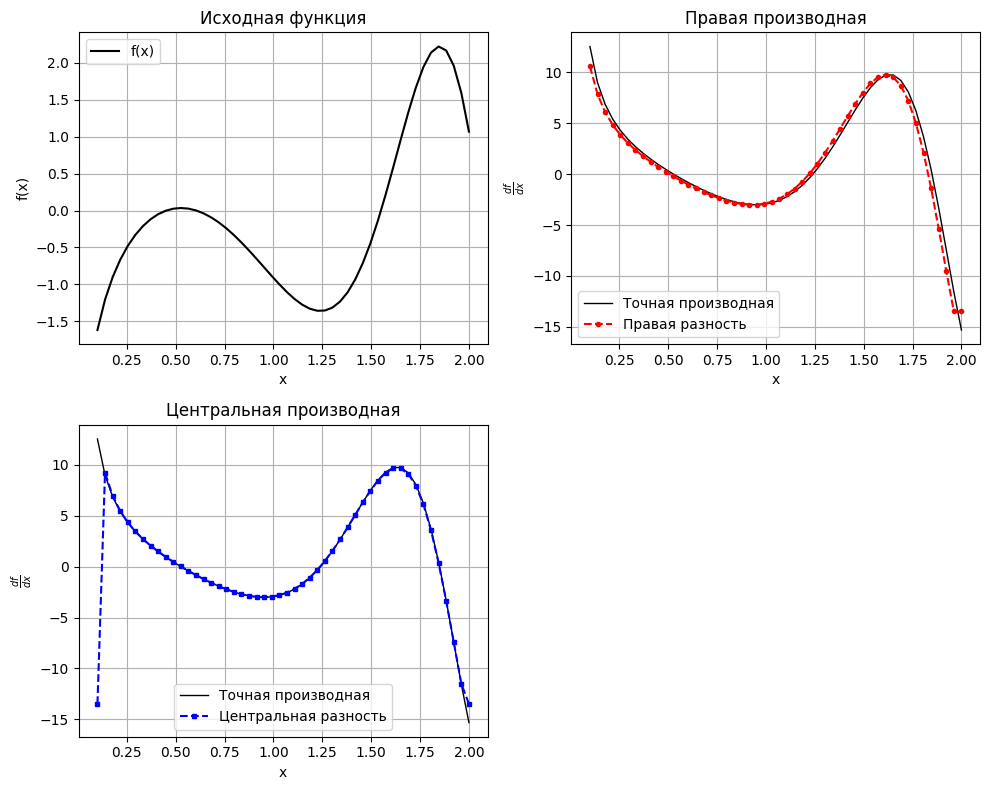

In [30]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(x_forward, f(x_forward), 'k-', label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Исходная функция')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_forward, df_exact, 'k-', label='Точная производная', linewidth=1)
plt.plot(x_forward, df_forward, 'ro--', markersize=3, label='Правая разность')
plt.xlabel('x')
plt.ylabel("$\\frac{df}{dx}$")
plt.title('Правая производная')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_forward, df_exact, 'k-', label='Точная производная', linewidth=1)
plt.plot(x_forward, df_central, 'bs--', markersize=3, label='Центральная разность')
plt.xlabel('x')
plt.ylabel("$\\frac{df}{dx}$")
plt.title('Центральная производная')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
# Таблица с несколькими точками для демонстрации
# print("\nСравнение результатов в нескольких точках:")
# print("x\t\tТочная\t\tПравая\t\tЦентральная")
# print("-" * 55)
# indices = [0, n//4, n//2, 3*n//4, -1]
# for i in indices:
#     print(f"{x_forward[i]:.3f}\t\t{df_exact[i]:.6f}\t{df_forward[i]:.6f}\t{df_central[i]:.6f}")

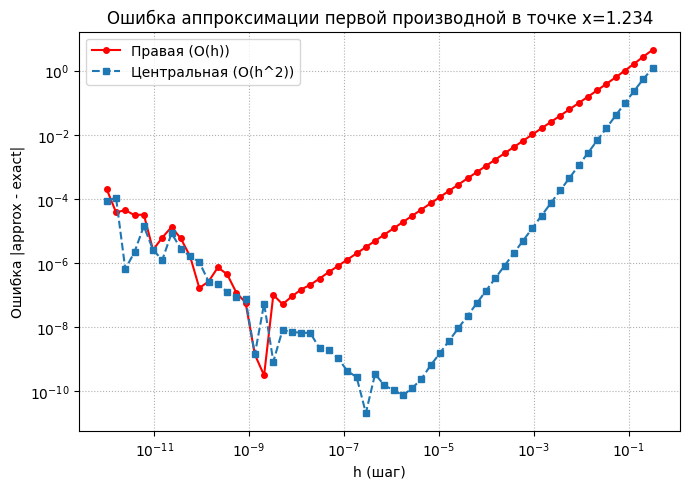

In [60]:
# Разностные аппроксимации для одной точки
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

# Точка, где считаем производную
x0 = 1.234
exact = exact_derivative(x0)

# Массив шагов
h_values = np.logspace(-12, -0.5, 60)

# Ошибки
err_forward = []
err_central = []

for h in h_values:
    df_forward = forward_difference(f, x0, h)
    df_central = central_difference(f, x0, h)
    err_forward.append(abs(df_forward - exact))
    err_central.append(abs(df_central - exact))

# Переводим в numpy-массивы
err_forward = np.array(err_forward)
err_central = np.array(err_central)

# Построение графика
plt.figure(figsize=(7,5))
plt.loglog(h_values, err_forward, 'ro-', markersize=4, label='Правая (O(h))')
plt.loglog(h_values, err_central, 's--', markersize=4, label='Центральная (O(h^2))')
plt.xlabel('h (шаг)')
plt.ylabel('Ошибка |approx - exact|')
plt.title('Ошибка аппроксимации первой производной в точке x=1.234')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()


**Задание 2.**

2й порядок точности для центральных разностей.

In [23]:
def second_derivative_2nd(x, a, b, n):
    # x = np.linspace(a, b, n)
    # n = len(x)
    h = x[1] - x[0]
    f2 = np.zeros_like(x)

    for i in range(1, n - 1):
        f2[i] = (f(x[i + 1]) - 2 * f(x[i]) + f(x[i - 1])) / (h ** 2)

    f2[0] = (f(x[2]) - 2 * f(x[1]) + f(x[0])) / (h ** 2)
    f2[-1] = (f(x[-1]) - 2 * f(x[-2]) + f(x[-3])) / (h ** 2)

    return x, f2    

4й порядок точности для центральных разностей.

In [55]:
def second_derivative_4nd(x, a, b, n):
    # x = np.linspace(a, b, n)
    # n = len(x)
    h = x[1] - x[0]
    
    d2f_dx2 = np.zeros_like(x)

    for i in range(2, n-2):
        d2f_dx2[i] = (-f(x[i+2]) + 16*f(x[i+1]) - 30*f(x[i]) + 16*f(x[i-1]) - f(x[i-2])) / (12*h**2)
    
    for i in [0, 1, n-2, n-1]:
        if i == 0:  # первая точка - правосторонняя разность
            d2f_dx2[i] = (f(x[i+2]) - 2*f(x[i+1]) + f(x[i])) / h**2
        elif i == 1:  # вторая точка - несимметричная формула
            d2f_dx2[i] = (f(x[i+1]) - 2*f(x[i]) + f(x[i-1])) / h**2
        elif i == n-2:  # предпоследняя точка
            d2f_dx2[i] = (f(x[i+1]) - 2*f(x[i]) + f(x[i-1])) / h**2
        else:  # последняя точка - левосторонняя разность
            d2f_dx2[i] = (f(x[i]) - 2*f(x[i-1]) + f(x[i-2])) / h**2
    
    return x, d2f_dx2

Точная формула для второй производной $f(x)$:
$$
f''(x) = -\frac{2\cos(e^x)}{x^2} - e^x \left( \frac{4}{x} + 2\ln x + 1 \right) \sin(e^x) - e^{2x} (2\ln x + 1) \cos(e^x)
$$

In [56]:
def exact_second_derivative(x):
    term1 = -2 * np.cos(np.exp(x)) / x**2
    term2 = -np.exp(x) * (4 / x + 2 * np.log(x) + 1) * np.sin(np.exp(x))
    term3 = -np.exp(2 * x) * (2 * np.log(x) + 1) * np.cos(np.exp(x))
    return term1 + term2 + term3

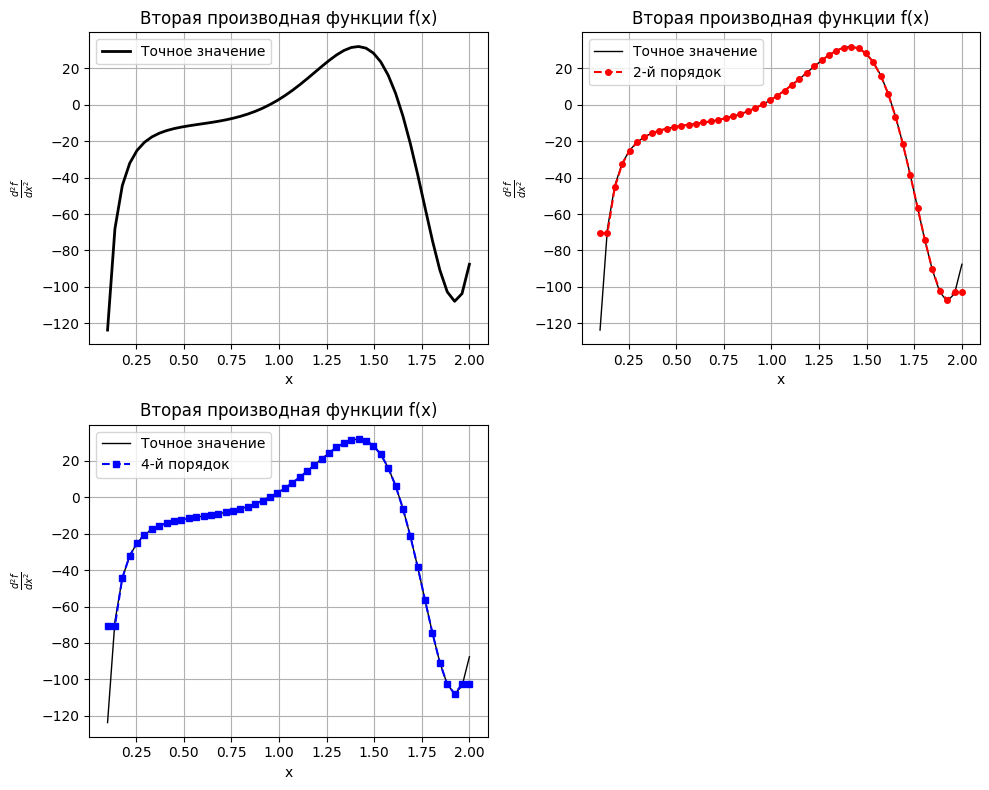

In [57]:
a, b = 0.1, 2
n = 50
x = np.linspace(a, b, n)

_, df2_2nd = second_derivative_2nd(x, a, b, n)
_, df2_4nd = second_derivative_4nd(x, a, b, n)
f2_exact = exact_second_derivative(x)

plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
plt.plot(x, f2_exact, 'k-', linewidth=2, label='Точное значение')
plt.xlabel('x')
plt.ylabel("$\\frac{d^2 f}{dx^2}$")
plt.title('Вторая производная функции f(x)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x, f2_exact, 'k-', linewidth=1, label='Точное значение')
plt.plot(x, df2_2nd, 'ro--', markersize=4, label='2-й порядок')
plt.xlabel('x')
plt.ylabel("$\\frac{d^2 f}{dx^2}$")
plt.title('Вторая производная функции f(x)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x, f2_exact, 'k-', linewidth=1, label='Точное значение')
plt.plot(x, df2_4nd, 'bs--', markersize=4, label='4-й порядок')
plt.xlabel('x')
plt.ylabel("$\\frac{d^2 f}{dx^2}$")
plt.title('Вторая производная функции f(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

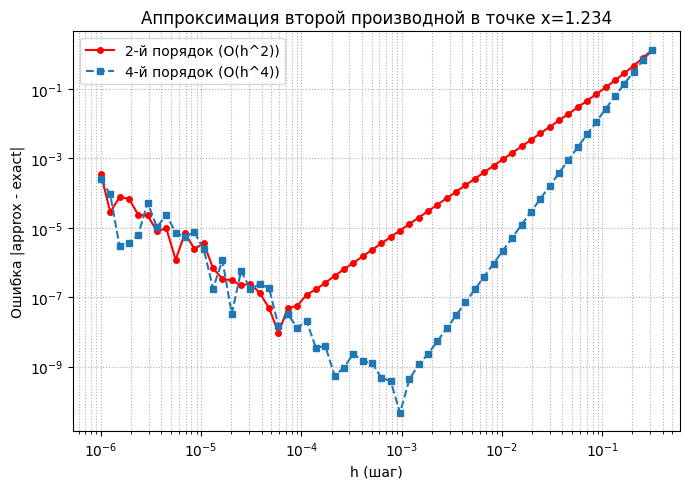

In [69]:
# --- схемы для 2-й производной ---
def second_derivative_2nd_point(f, x0, h):
    """Аппроксимация второй производной 2-го порядка"""
    return (f(x0+h) - 2*f(x0) + f(x0-h)) / h**2

def second_derivative_4nd_point(f, x0, h):
    """Аппроксимация второй производной 4-го порядка"""
    return (-f(x0+2*h) + 16*f(x0+h) - 30*f(x0) + 16*f(x0-h) - f(x0-2*h)) / (12*h**2)

x0 = 1.234
exact = exact_second_derivative(x0)

h_values = np.logspace(-6, -0.5, 60)   # шаги (не берем слишком малые, чтобы избежать переполнения)

err_2nd = []
err_4th = []

for h in h_values:
    d2_2nd = second_derivative_2nd_point(f, x0, h)
    d2_4th = second_derivative_4nd_point(f, x0, h)
    err_2nd.append(abs(d2_2nd - exact))
    err_4th.append(abs(d2_4th - exact))

err_2nd = np.array(err_2nd)
err_4th = np.array(err_4th)

plt.figure(figsize=(7,5))
plt.loglog(h_values, err_2nd, 'ro-', markersize=4, label='2-й порядок (O(h^2))')
plt.loglog(h_values, err_4th, 's--', markersize=4, label='4-й порядок (O(h^4))')
plt.xlabel('h (шаг)')
plt.ylabel('Ошибка |approx - exact|')
plt.title('Аппроксимация второй производной в точке x=1.234')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()


**Анализ ошибок численного дифференцирования**

На графике зависимости ошибки от шага $h$ в лог-логарифмическом масштабе $(log-log)$ можно выделить три характерные области.

1. Область больших шагов $h$ (левая часть графика)

Когда шаг $h$ слишком велик, формулы численного дифференцирования (правые, центральные разности и др.) плохо приближают истинную производную.

Ошибка в этой области велика и уменьшается с уменьшением шага $h$.
Наклон линии на log-log графике примерно соответствует порядку аппроксимации используемой схемы:
*   Правая (левая) разность: наклон ≈ 1 (ошибка $∼O(h)$)
*   Центральная разность: наклон ≈ 2 (ошибка $∼O(h²)$)
*   Трехточечная схема для второй производной: наклон ≈ 2
*   Пятиточечная схема: наклон ≈ 4

2. Область средних значений $h$ (асимптотическая область)

Это оптимальная область, где ошибка ведет себя в соответствии с теорией.

*   На графике она выглядит как почти прямая линия.
*   Наклон линии стабилен и точно равен порядку точности метода.
*   Шаг $h$ уже достаточно мал для точной аппроксимации, но еще не настолько мал, чтобы вносить значительную ошибку округления.
*   Именно по наклону кривой в этой области удобнее всего оценивать порядок метода.

3. Область очень малых шагов $h$ (правая часть графика)

При чрезмерно малых значениях $h$ начинают доминировать ошибки, связанные с конечной точностью вычислений с плавающей запятой.

*   Причина: при вычислении разности $f(x+h) - f(x)$ для очень малых $h$ значения функции становятся экстремально близкими. Происходит катастрофическая потеря значащих цифр.
*   Результат на графике: после первоначального уменьшения ошибка перестает убывать, достигает минимального значения и затем начинает расти.
*   Этот эффект ограничивает максимальную достижимую точность численных методов.